<a href="https://colab.research.google.com/github/betussi/IA/blob/main/EAFC25_PredictPromisingPlayers_LinearSimpleModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Carregar o dataset
df = pd.read_csv('/content/drive/MyDrive/dataset/male_players.csv')

In [ ]:
# Exibir as primeiras linhas do dataset para entender sua estrutura
print(df.head())

   Unnamed: 0.1  Unnamed: 0  Rank             Name  OVR  PAC  SHO  PAS  DRI  \
0             0           0     1    Kylian Mbappé   91   97   90   80   92   
1             1           1     2            Rodri   91   66   80   86   84   
2             2           2     4   Erling Haaland   91   88   92   70   81   
3             3           3     5  Jude Bellingham   90   80   87   83   88   
4             4           4     7         Vini Jr.   90   95   84   81   91   

   DEF  ...   Nation            League             Team  \
0   36  ...   France  LALIGA EA SPORTS      Real Madrid   
1   87  ...    Spain    Premier League  Manchester City   
2   45  ...   Norway    Premier League  Manchester City   
3   78  ...  England  LALIGA EA SPORTS      Real Madrid   
4   29  ...   Brazil  LALIGA EA SPORTS      Real Madrid   

                                          play style  \
0  Quick Step+, Acrobatic, Finesse Shot, Flair, R...   
1  Tiki Taka+, Aerial, Bruiser, Long Ball Pass, P...   
2 

In [ ]:
# Selecionar as características relevantes para o modelo de regressão linear
features = ['PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']
target = 'OVR'

In [ ]:
# Dividir os dados em conjuntos de treinamento e teste
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

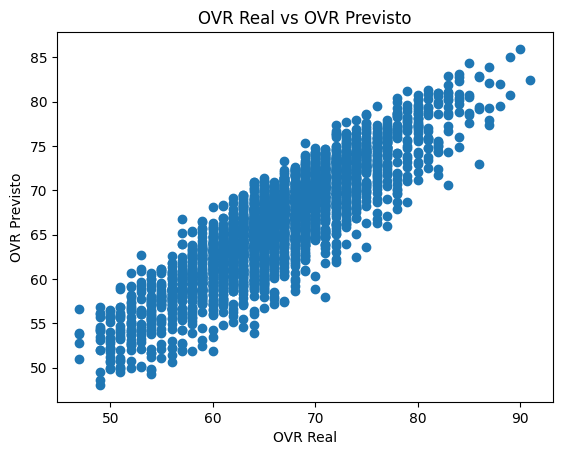

In [ ]:
# Plotar os resultados
plt.scatter(y_test, y_pred)
plt.xlabel('OVR Real')
plt.ylabel('OVR Previsto')
plt.title('OVR Real vs OVR Previsto')
plt.show()

In [ ]:
# Imprimir os coeficientes do modelo
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print(coefficients)

     Coefficient
PAC     0.017031
SHO     0.021955
PAS     0.058406
DRI     0.408365
DEF     0.092562
PHY     0.277548


In [ ]:
# Prever jogadores promissores com base em seus atributos
df['Predicted_OVR'] = model.predict(df[features])
promising_players = df[df['Predicted_OVR'] > df['OVR']]
print(promising_players[['Name', 'OVR', 'Predicted_OVR']])

                Name  OVR  Predicted_OVR
131     Marcos Acuña   83      83.524320
146    Leon Goretzka   83      83.340301
194        Joelinton   82      84.644334
207    Lucas Paquetá   82      82.200078
236      Reece James   82      83.236966
...              ...  ...            ...
16156   Engson Singh   47      52.777942
16157  Ousmane Sylla   47      53.651245
16158       Wei Feng   47      53.865513
16159     Won Hui Do   47      56.567204
16160      Wu Yuhang   47      53.201009

[8708 rows x 3 columns]
